# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [10]:
# импорт всех нужных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# загружаем датасет из файла
telecom_users = pd.read_csv('telecom_users.csv', index_col=0, skipinitialspace=True)
telecom_users.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No
5260,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.60,No
6001,4367-NHWMM,Female,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.90,No
1480,8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,No,No,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
5137,8016-NCFVO,Male,1,No,No,55,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


In [ ]:
#оцениваем типы и наличие пропусков в столбцах
telecom_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

In [12]:
# существует 10 пропусков данных в колонке TotalCharges, удалим их
telecom_users = telecom_users.dropna()
telecom_users

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [ ]:
#оценим основные метрики для числовых данных
telecom_users.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5976.000000,5976.000000,5976.000000,5976.000000
mean,0.161647,32.523092,64.846687,2298.060617
std,0.368157,24.500858,30.107576,2274.127165
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,404.312500
50%,0.000000,29.000000,70.425000,1412.150000
75%,0.000000,56.000000,89.900000,3846.962500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#оценим остальные данные
telecom_users.describe(include=np.object)

<ipython-input-7-8477d2bc93d4>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  telecom_users.describe(include=np.object)


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976
unique,5976,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,5349-IECLD,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3044,3080,4195,5388,2843,2627,2982,2604,2639,2959,2388,2353,3269,3525,2006,4389


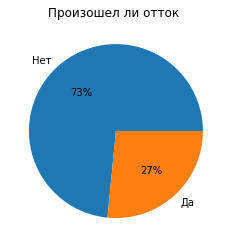

In [ ]:
#оценим соотношение групп ушедших и неушедших клиентов

plt.pie(telecom_users['Churn'].value_counts(), labels=['Нет', 'Да'], autopct='%1.0f%%')
plt.title('Произошел ли отток ')
plt.show()

# 2. Исследование зависимостей и формулирование гипотез

На основе имеющихся данных можно сделать предположения в зависимостях:
1. Отток клиентов происходит из-за высокой стоимости их услуг, значит, их месячная оплата выше средней.
2. Ушел клиент или остался не зависит от пола, состоит ли он в браке и является ли пенсионером.

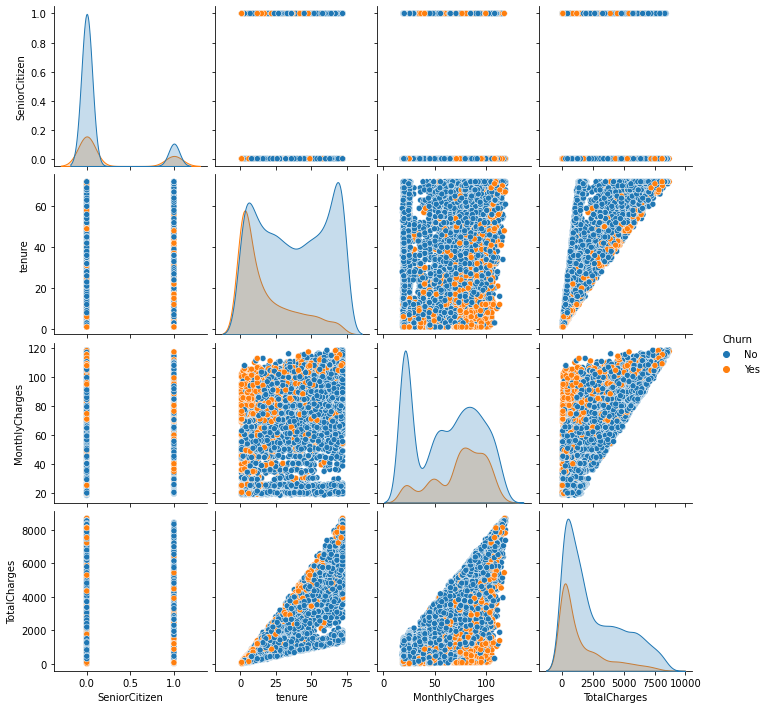

In [ ]:
#построим график для поиска зависимостей численных признаков
sns.pairplot(data=telecom_users, hue='Churn')


In [ ]:
# методом one-hot encoding преобразуем категоритальные признаки для поиска зависимостей и удалим ненужные повторы
data = telecom_users[['Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']]
data = pd.get_dummies(telecom_users, columns=data.columns[data.dtypes==object])

data = data.drop(['OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'MultipleLines_No phone service' ], axis=1)


<AxesSubplot:>

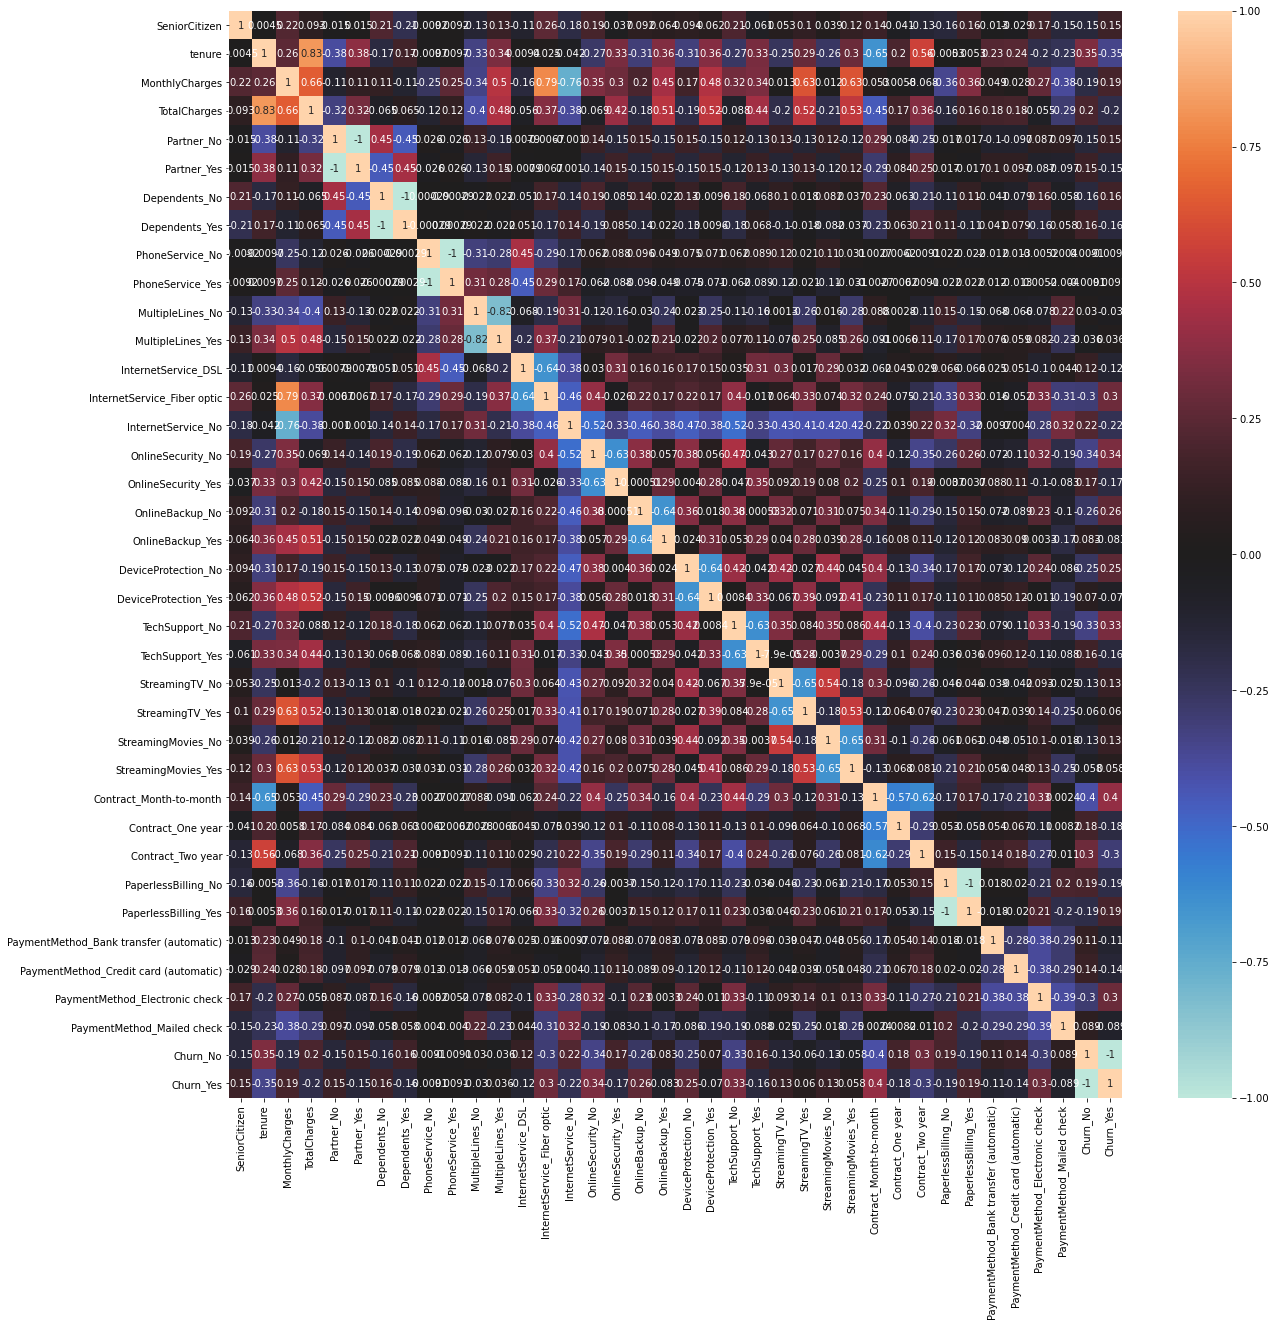

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, center=0)

Из полученных графиков можно наблюдать, что в датасете нет признаков с высоким уровнем корреляции с оттоком пользователей, но связи все равно можно выделить:
1. Можно подтвердить гипотезу про связь оттока и цены. На гистограмме затрат в месяц пик ушедших клиентов сдвинут сильно вправо. 2. Глядя на тепловую карту и распределение на графике можно сказать, что гипотеза про отсутвие связи оттока с социальными признаками отсутсвует. 
Также можно увидеть:
1. Связь количество месяцев пользования с оттоком. В основная масса людей уходит в самом начале пользования услугами. А значит, логична связь оттока с помеясчной оплатой. Так как те, кто заключает контракт на год или два и платят меньше, и это более удобно.
2. Связь оттока с неподключенной услугой технической поддержки. 


# 3. Построение моделей для прогнозирования оттока

В данном случае нам важно предотвратить отток клиентов, поэтому важной метрикой качества модели будем считать Recall.
Начнем с градиентного бустинга.

In [13]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import StackingClassifier

In [14]:
#Для начала сформируем X и y
data = telecom_users[['Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']]
data = pd.get_dummies(telecom_users, columns=data.columns[data.dtypes==object])

data = data.drop(['OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'MultipleLines_No phone service' ], axis=1)
data['Churn'] = data['Churn'].apply(lambda x: 1 if x=='Yes' else 0)
data['gender'] = data['gender'].apply(lambda x: 1 if x=='Female' else 0)

X = data[['gender', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]
Y=data['Churn']

In [15]:
#разделим на тестовую и тренировочную выборки и создадим объекты DMatrix
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, stratify=Y, random_state=17)
dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)

In [ ]:
#так как выборка у нас не сбаралнсироанная исользуем веса
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
scale_pos_weight

2.765076507650765

In [ ]:
#зададим параметры алгоритма
xgb_params = {'objective': 'binary:logistic', 
          'max_depth': 3, 
          'silent': 1, 
          'eta': 0.05,
        'scale_pos_weight': scale_pos_weight}

num_rounds=50

In [ ]:
#обучим модель
xgb_model = xgb.train(xgb_params, dtrain, num_rounds)

[15:26:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:26:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
recall_score(y_test,(xgb_model.predict(dtest) > 0.5 ).astype(int))

0.8487394957983193

Теперь построим несколько классификаторов, проверим их полноту и соединим потом их с помощью стекинга

In [8]:
#объявим модели
gbc = GradientBoostingClassifier()
lr = LogisticRegression(random_state=17)
svc = SVC(random_state=17)
rfc = RandomForestClassifier()

meta = XGBClassifier(n_estimators=40)

In [ ]:
#подберем лучшие параметры для каждой модели с применением кросс-валидации
gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} # GradientBoostingClassifier

rfc_params = {'n_estimators': range(10, 100, 10), # RandomForestClassifier
              'min_samples_leaf': range(1, 5)}

svc_params = {'kernel': ['linear', 'rbf'], # SVC
              'C': np.arange(0.1, 1, 0.2)}

lr_params = {'C': np.arange(0.5, 1, 0.1)}

skf = StratifiedKFold(n_splits=5)

gbc_grid = GridSearchCV(gbc, gbc_params, cv=skf)
rfc_grid = GridSearchCV(rfc, rfc_params, cv=skf)
svc_grid = GridSearchCV(svc, svc_params, cv=skf)
lr_grid = GridSearchCV(lr, lr_params, cv=skf)


In [ ]:
#обучим, выведем лучшие параметры и проверим полноту моделей
gbc_grid.fit(x_train, y_train)
print('GBC', gbc_grid.best_params_)
rfc_grid.fit(x_train, y_train)
print('RFC', rfc_grid.best_params_)
svc_grid.fit(x_train, y_train)
print('SVC', svc_grid.best_params_)
lr_grid.fit(x_train, y_train)
print('LR', lr_grid.best_params_)

print('Для GBC:')
print(recall_score(y_test, gbc_grid.predict(x_test)))
print('Для RFC:')
print(recall_score(y_test, rfc_grid.predict(x_test)))
print('Для SVC:')
print(recall_score(y_test, svc_grid.predict(x_test)))
print('Для LR:')
print(recall_score(y_test, lr_grid.predict(x_test)))

GBC {'learning_rate': 0.1}
RFC {'min_samples_leaf': 4, 'n_estimators': 50}
SVC {'C': 0.1, 'kernel': 'linear'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR {'C': 0.5}
Для GBC:
0.4957983193277311
Для RFC:
0.4852941176470588
Для SVC:
0.49369747899159666
Для LR:
0.5294117647058824


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Так как качество всех моделей не превышает 0.53, отдельно их рассматривать не будем, а проведем стэкинг.

In [16]:
estimators = [
     ('gbc', GradientBoostingClassifier(learning_rate=0.1,random_state=17)),
     ('lr', LogisticRegression(C=0.5, random_state=17)),
('rfc', RandomForestClassifier(n_estimators=50, min_samples_leaf=4,random_state=17)),
 ('svc', SVC(C=0.1, kernel='linear', random_state=17))]
clf = StackingClassifier(
    estimators=estimators, final_estimator=XGBClassifier(eta=0.05, random_state=17)
 )
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


StackingClassifier(estimators=[('gbc',
                                GradientBoostingClassifier(random_state=17)),
                               ('lr',
                                LogisticRegression(C=0.5, random_state=17)),
                               ('rfc',
                                RandomForestClassifier(min_samples_leaf=4,
                                                       n_estimators=50,
                                                       random_state=17)),
                               ('svc',
                                SVC(C=0.1, kernel='linear', random_state=17))],
                   final_estimator=XGBClassifier(eta=0.05, random_state=17))

In [17]:
#получим предсказания
clf_predict=clf.predict(x_test)

In [18]:
#проверим полноту модели
recall_score(y_test, clf_predict)

0.5042016806722689

# 4. Сравнение качества моделей 

Оценим градиентный бустинг и стекинг еще по другим метрикам

In [ ]:
print('Градиентный бустинг:')
print('Precision:', precision_score(y_test,(xgb_model.predict(dtest) > 0.5 ).astype(int)))
print('Accuracy:',accuracy_score(y_test,(xgb_model.predict(dtest) > 0.5 ).astype(int)))
print('Recall:', recall_score(y_test,(xgb_model.predict(dtest) > 0.5 ).astype(int)))
print('Матрица ошибок:')
print(confusion_matrix(y_test,(xgb_model.predict(dtest) > 0.5 ).astype(int)))


Градиентный бустинг:
Precision: 0.5088161209068011
Accuracy: 0.7423312883435583
Recall: 0.8487394957983193
Матрица ошибок:
[[927 390]
 [ 72 404]]


In [19]:
print('Стекинг:')
print('Precision:', precision_score(y_test,clf_predict))
print('Accuracy:',accuracy_score(y_test,clf_predict))
print('Recall:', recall_score(y_test,clf_predict))
print('Матрица ошибок:')
print(confusion_matrix(y_test,clf_predict))

Стекинг:
Precision: 0.6779661016949152
Accuracy: 0.8047964305633017
Recall: 0.5042016806722689
Матрица ошибок:
[[1203  114]
 [ 236  240]]


# Выводы:

В рамках работы было выявлено, что в данных представлены достаточно слабые зависимости ухода пользователей от их парметров. На основе этих данных были построены различные модели классификации: градиентный бустинг и стекинг. После сравнения качества моделей различными метриками, можно сделать вывод:точность прогноза в стекинге выше, но полнота лучше в градиентном бустинге. А так как компании более важно предотвратить уход клиента, градиентный бустинг является предпочтительным по использованию.